<a href="https://colab.research.google.com/github/AnabelBerumen/DataScientist/blob/main/modelos/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K Nearest Neighbors

In [ ]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing, neighbors
from sklearn.model_selection import cross_validate, train_test_split

In [ ]:
df = pd.read_csv('/content/breast-cancer-wisconsin.data.txt', header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


In [ ]:
df.shape

(699, 11)

In [ ]:
df.describe()

,0,1,2,3,4,5,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [ ]:
df.columns = ['name', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'class']
df.head(3)

,name,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


Un poco de limpieza

In [ ]:
df = df.drop(['name'], 1)
df.replace('?', -99999, inplace=True)
Y = df['class']
X = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']]

<ipython-input-9-ae5eb92edca1>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['name'], 1)


In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [ ]:
Y.head(3)

0    2
1    2
2    2
Name: class, dtype: int64

Clasificador de los K vecinos

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
accuracy = clf.score(X_test, Y_test)
accuracy

0.9642857142857143

### Clasificaci'on sin limpieza

In [ ]:
df = pd.read_csv('/content/breast-cancer-wisconsin.data.txt', header=None)

df.replace('?', -99999, inplace=True)
df.columns = ['name', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'class']

Y = df['class']
X = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, Y_train)

accuracy = clf.score(X_test, Y_test)
accuracy

0.9785714285714285

Clasificar nuevos datos

In [ ]:
sample_measure = np.array([4,2,1,1,1,2,3,2,1]).reshape(1, -1)

predict = clf.predict(sample_measure)
predict

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])

In [ ]:
sample_measure2 = np.array([[4,2,1,1,1,2,3,2,1], [4,2,1,1,1,2,3,2,1]]).reshape(2, -1)

predict = clf.predict(sample_measure2)
predict

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2, 2])

## Crear algoritmo de KNN desde 0

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from collections import Counter
from math import sqrt

In [ ]:
dataset = {
    'k': [[1,2], [2,3], [3,1]],
    'r': [[6,5], [7,7], [8,6]],    
}

new_point = [5,7]

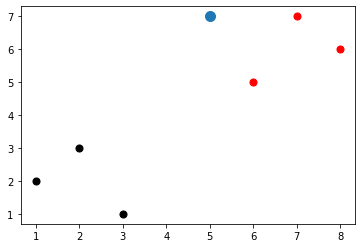

In [ ]:
[[plt.scatter(ii[0], ii[1], s=50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s=100)

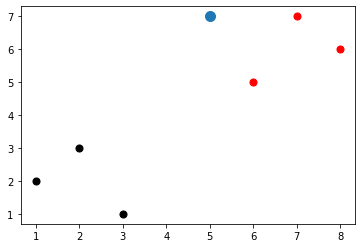

In [ ]:
for i in dataset:
  for ii in dataset[i]:
    plt.scatter(ii[0], ii[1], s=50, color = i)

plt.scatter(new_point[0], new_point[1], s=100)

In [ ]:
def k_nearest_neighbors(data, predict, k=3, verbose=False):

  if len(data) >= k:
    warnings.warn('K es un valor menor que el número de elementos')
  
  distances = []

  for group in data:
    for feature in data[group]:
      # d = sqrt((feature[0] - predict[0]**2) + (feature[1] - predict[1])**2)
      # d = np.sqrt(np.sum((np.array(feature) - np.array(predict))**2))
      d = np.linalg.norm(np.array(feature) - np.array(predict))
      
      distances.append([d, group])
  if verbose:
    print(distances)

  votes = [i[1] for i in sorted(distances)[:k]] # sorted ordena por la primer columna
  if verbose:
    print(votes)


  vote_result = Counter(votes).most_common(1)
  if verbose:
    print(vote_result)

  return vote_result[0][0]

In [ ]:
c = Counter('sakdhjfgaksdfhdaldsjkhf').most_common(3)
c

[('d', 4), ('s', 3), ('a', 3)]

In [ ]:
result = k_nearest_neighbors(dataset, new_point)
result

[[6.4031242374328485, 'k'], [5.0, 'k'], [6.324555320336759, 'k'], [2.23606797749979, 'r'], [2.0, 'r'], [3.1622776601683795, 'r']]
['r', 'r', 'r']
[('r', 3)]


'r'

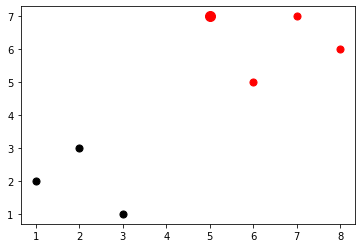

In [ ]:
[[plt.scatter(ii[0], ii[1], s=50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s=100, color=result)

## Aplicando nuestro KNN a Dataset del Cancer

In [ ]:
df = pd.read_csv('/content/breast-cancer-wisconsin.data.txt')

In [ ]:
df.replace('?', -9999, inplace=True)

In [ ]:
df.columns = ['name', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'class']

df.drop(['name'], 1, inplace=True)

full_data = df.astype(float).values.tolist()
full_data

In [ ]:
import random

random.shuffle(full_data)

test_size = 0.2

train_set={2:[], 4:[]}
test_set = {2:[], 4:[]}

train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [ ]:
for i in train_data:
  train_set[i[-1]].append(i[:-1])

for i in test_data:
  test_set[i[-1]].append(i[:-1])

In [ ]:
correct = 0
total = 0
for group in test_set:
  for data in test_set[group]:
    vote = k_nearest_neighbors(train_set, data, k=5)
    if group == vote:
      correct += 1
    total += 1

print('Eficacia del KNN =', correct/total)

Eficacia del KNN = 0.9568345323741008
